In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib as j
import re
import warnings
warnings.filterwarnings('ignore')

# 1.**Gather Data**

In [2]:
df = pd.read_csv('housing.csv')
pd.concat([df.head(),df.tail()])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
rows, columns = df.shape
print(f'Rows:{rows} , Columns:{columns}')

Rows:20640 , Columns:10


In [5]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# **2.EDA**

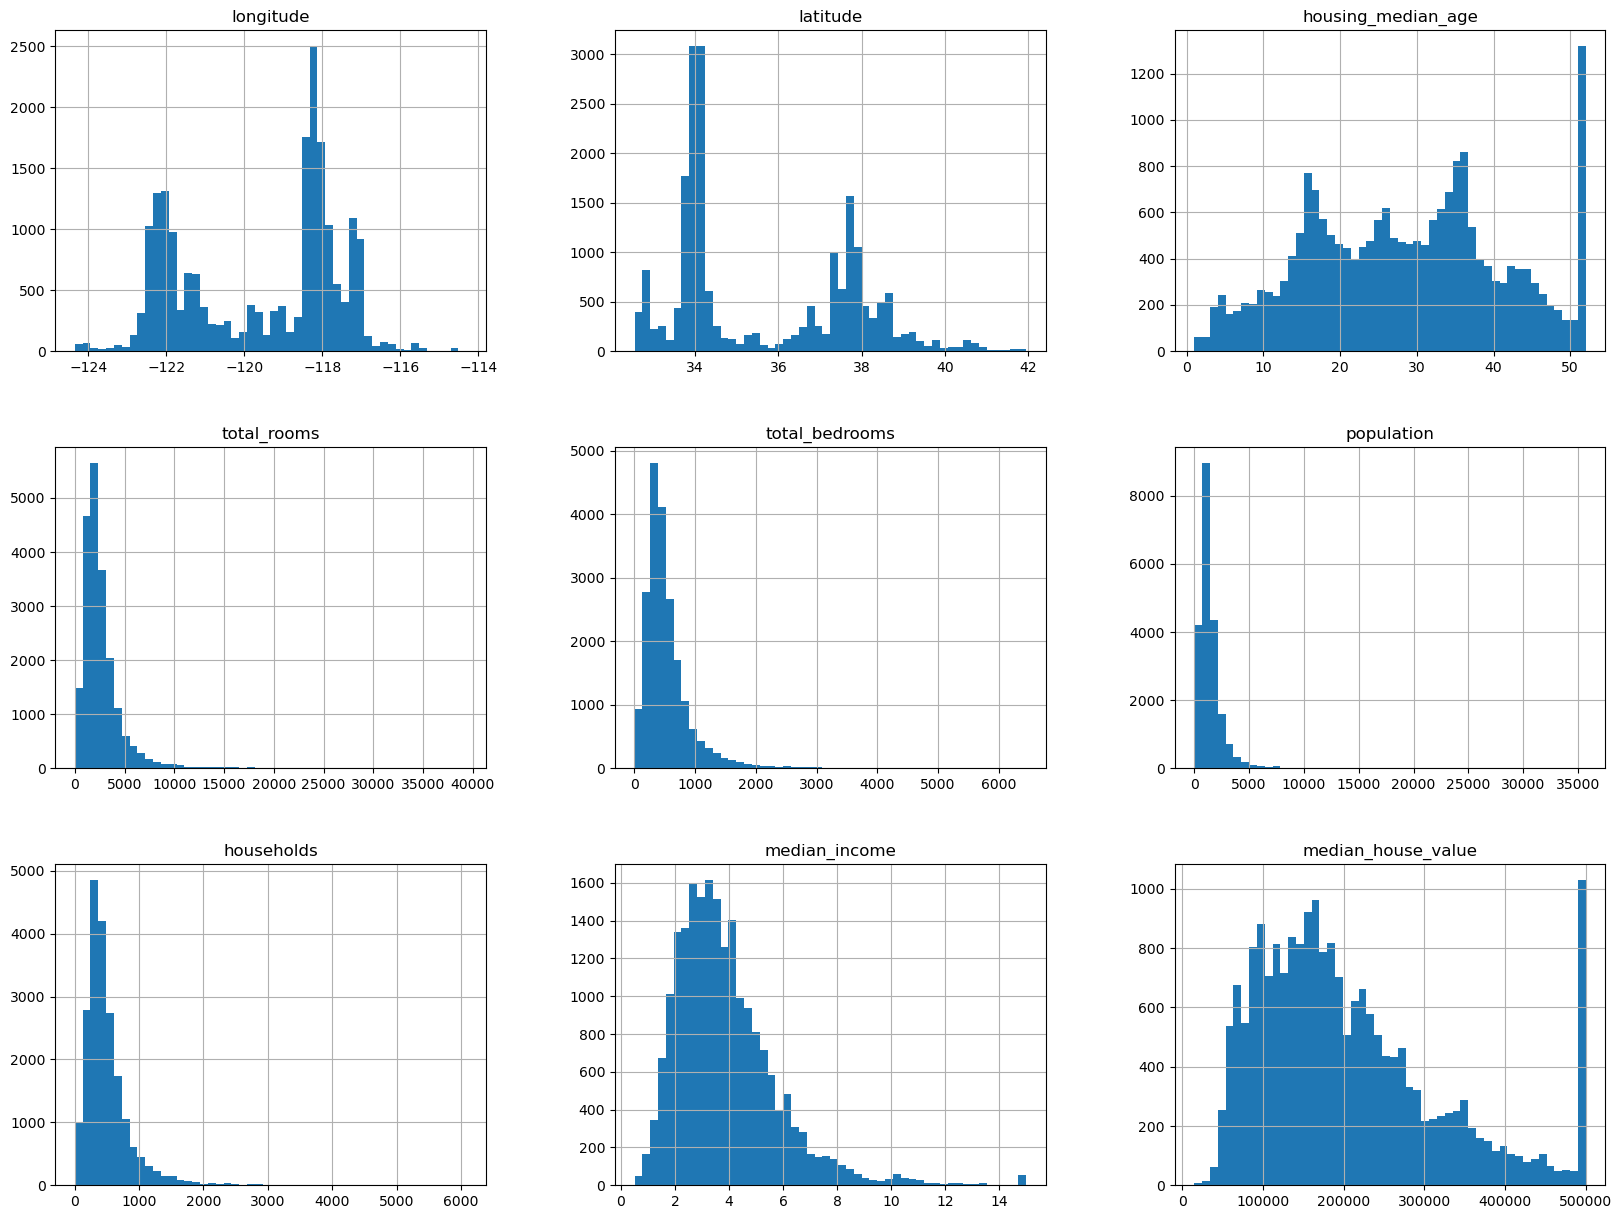

In [7]:
df.hist(bins=50,figsize=(20,15));

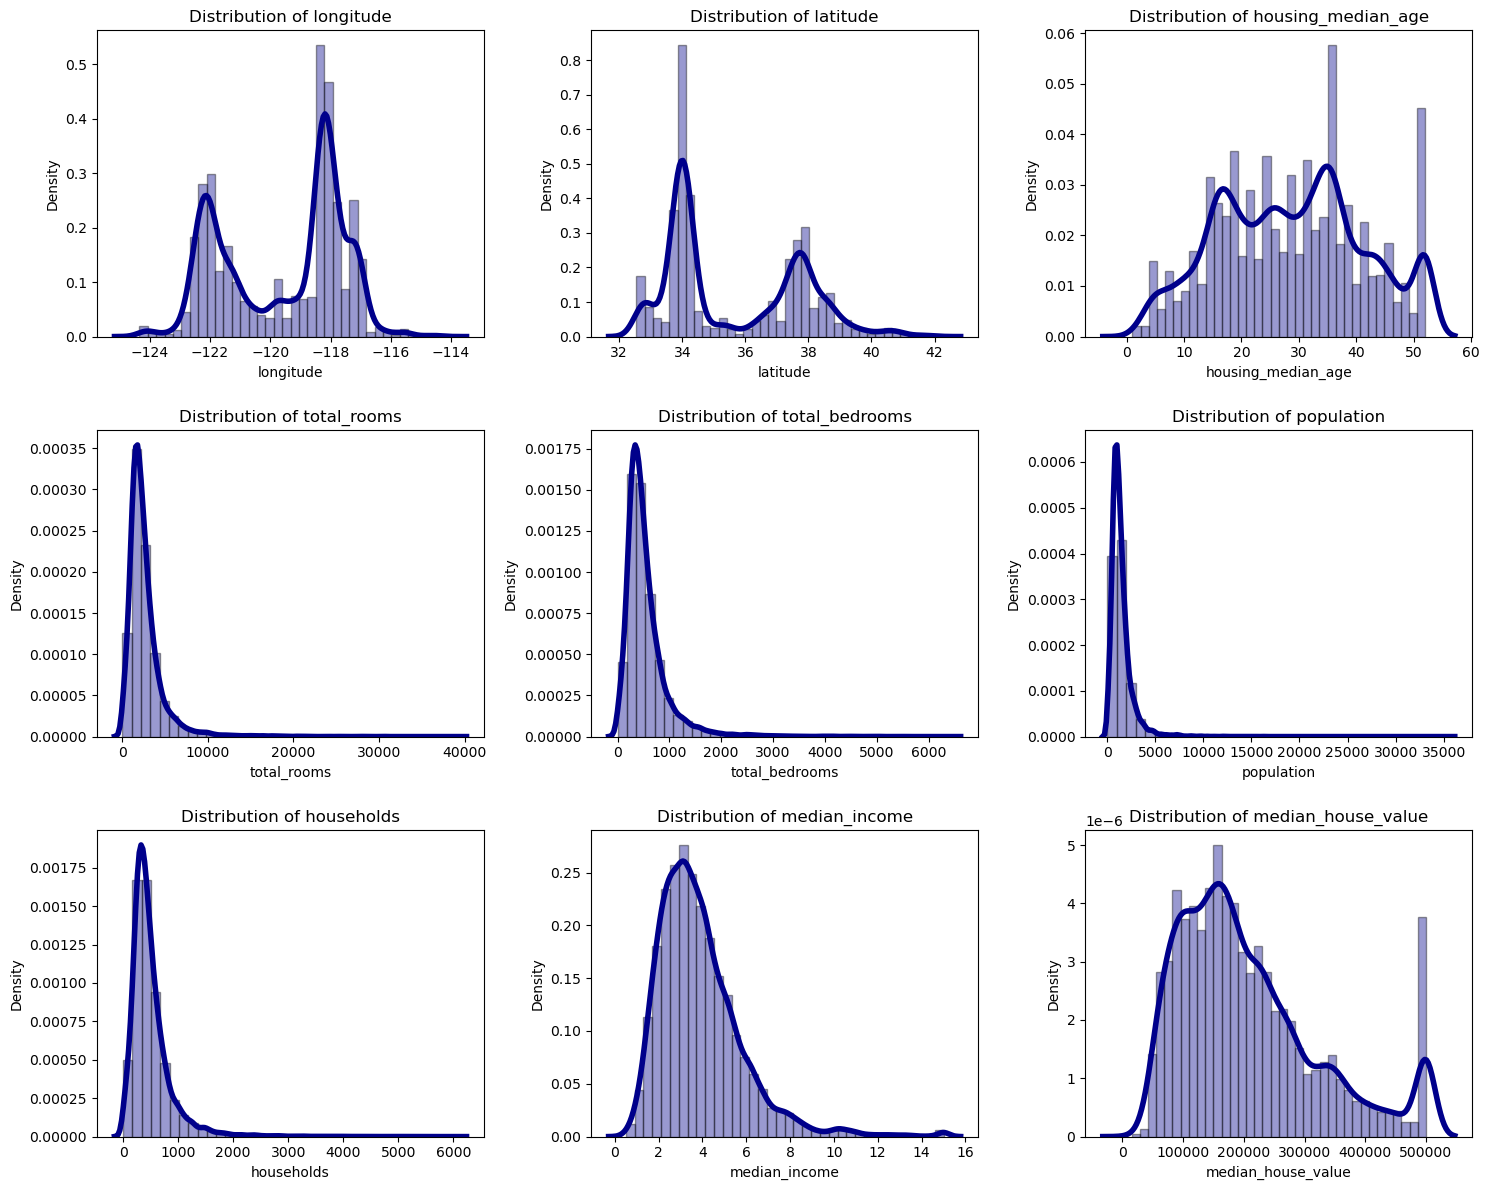

In [8]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 
           'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.distplot(df[col], hist=True, kde=True,
                 bins=int(180/5), color='darkblue',
                 hist_kws={'edgecolor': 'black'},
                 kde_kws={'linewidth': 4},
                 ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

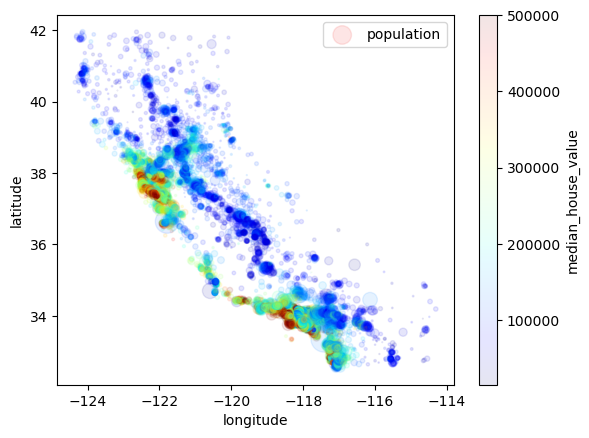

In [9]:
df.plot(kind='scatter',x='longitude',y='latitude',
        alpha=0.1,
        s=df['population']/100,
        label='population',
        c='median_house_value',
        cmap=plt.get_cmap('jet'))
plt.show()

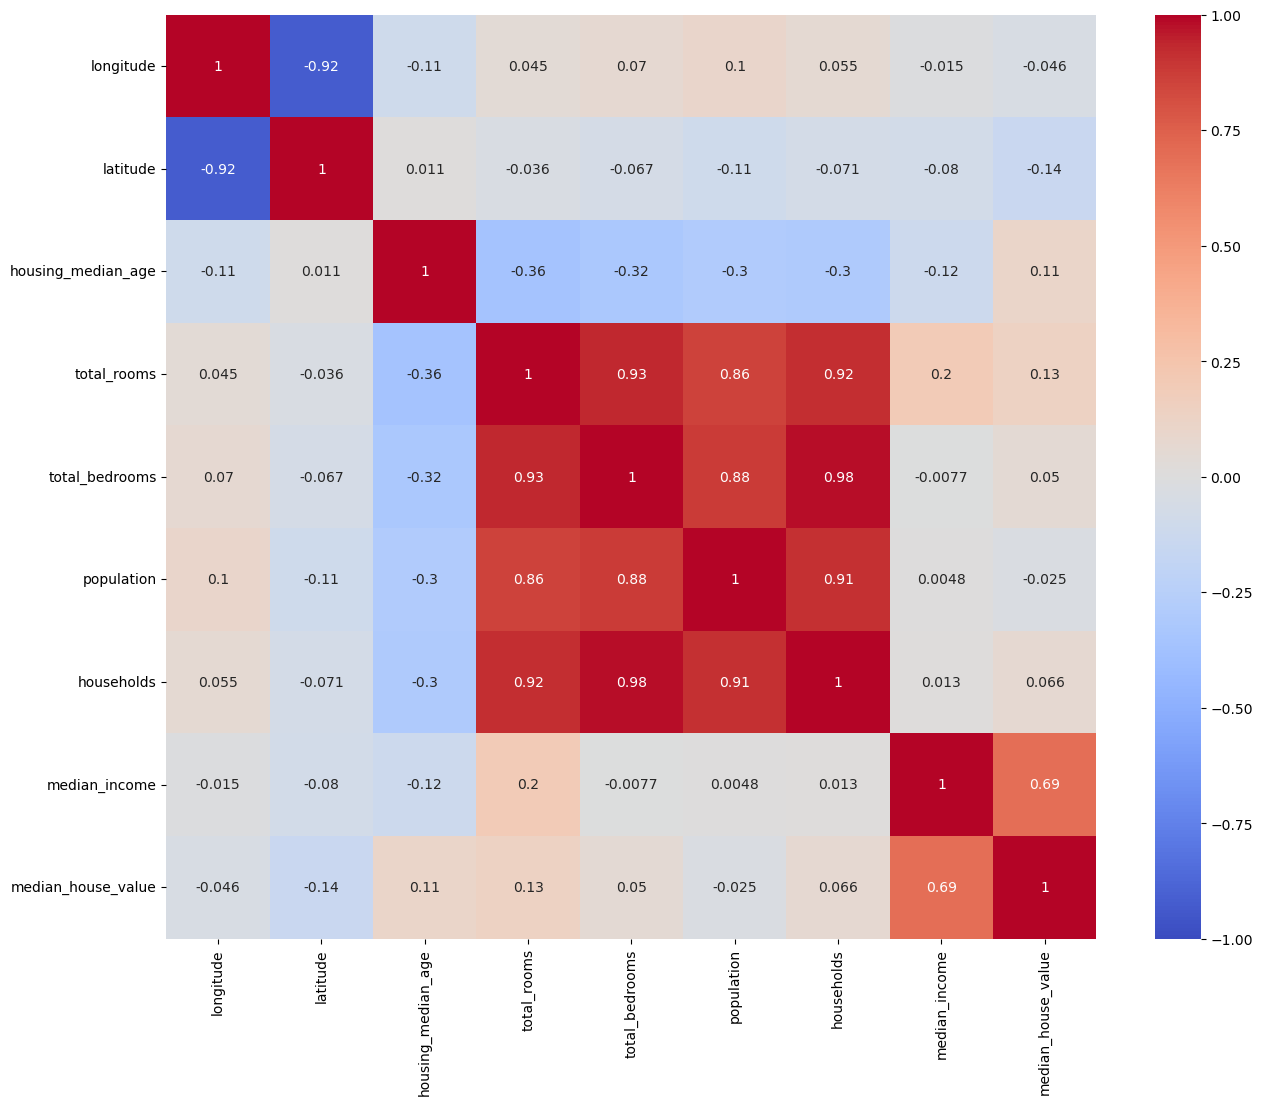

In [10]:
plt.figure(figsize=(15,12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

In [11]:
correlation_matrix = df.corr()
correlation_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

# **3.Data Preproccessing**

In [12]:
df_na=df.dropna(subset=['total_bedrooms'])
df_na.shape

(20433, 10)

In [13]:
dummies=pd.get_dummies(df_na.ocean_proximity)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [14]:
df_na_dummies=pd.concat([df_na,dummies],axis='columns')
df_na_dummies

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [15]:
df_clean = df_na_dummies.drop(['ocean_proximity','ISLAND'],axis='columns')
df_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0


# **4.Building Linear Regression Model**

In [16]:
X = df_clean.drop(columns=['median_house_value'])
y = df_clean['median_house_value']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1942)

In [18]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [19]:
print(f'1-Intercept is: {lr_model.intercept_}')
print(f'2-The set of Coefficients:\n{lr_model.coef_}')
print(f'3-The R-Squared Value is: {lr_model.score(X_train,y_train)}')

1-Intercept is: -2045843.5115990783
2-The set of Coefficients:
[-2.62844899e+04 -2.48157243e+04  1.07909779e+03 -5.69678006e+00
  9.59989490e+01 -3.68843400e+01  5.01005703e+01  3.88932802e+04
 -1.84200772e+05 -2.24569571e+05 -1.87516028e+05 -1.78144879e+05]
3-The R-Squared Value is: 0.6438936814002372


In [20]:
y_pred = lr_model.predict(X_test)

In [21]:
df_values = pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
pd.concat([df_values.head(),df_values.tail()])

,Actual Values,Predicted Values
8171,256300.0,202745.793776
4885,117700.0,141183.010524
7434,156100.0,183783.814644
1195,86400.0,34015.888880
17966,288900.0,311246.027672
15556,187700.0,174257.308042
9217,50700.0,62701.766236
6184,165700.0,250084.450227
4611,141700.0,166804.392740
2408,69200.0,36343.273736


In [22]:
df_values['error'] = df_values['Actual Values']-df_values['Predicted Values']
df_values

,Actual Values,Predicted Values,error
8171,256300.0,202745.793776,53554.206224
4885,117700.0,141183.010524,-23483.010524
7434,156100.0,183783.814644,-27683.814644
1195,86400.0,34015.888880,52384.111120
17966,288900.0,311246.027672,-22346.027672
...,...,...,...
15556,187700.0,174257.308042,13442.691958
9217,50700.0,62701.766236,-12001.766236
6184,165700.0,250084.450227,-84384.450227
4611,141700.0,166804.392740,-25104.392740


In [23]:
df_values.reset_index(drop=True,inplace=True)
df_values.reset_index(inplace=True)
df_values

,index,Actual Values,Predicted Values,error
0,0,256300.0,202745.793776,53554.206224
1,1,117700.0,141183.010524,-23483.010524
2,2,156100.0,183783.814644,-27683.814644
3,3,86400.0,34015.888880,52384.111120
4,4,288900.0,311246.027672,-22346.027672
...,...,...,...,...
4082,4082,187700.0,174257.308042,13442.691958
4083,4083,50700.0,62701.766236,-12001.766236
4084,4084,165700.0,250084.450227,-84384.450227
4085,4085,141700.0,166804.392740,-25104.392740


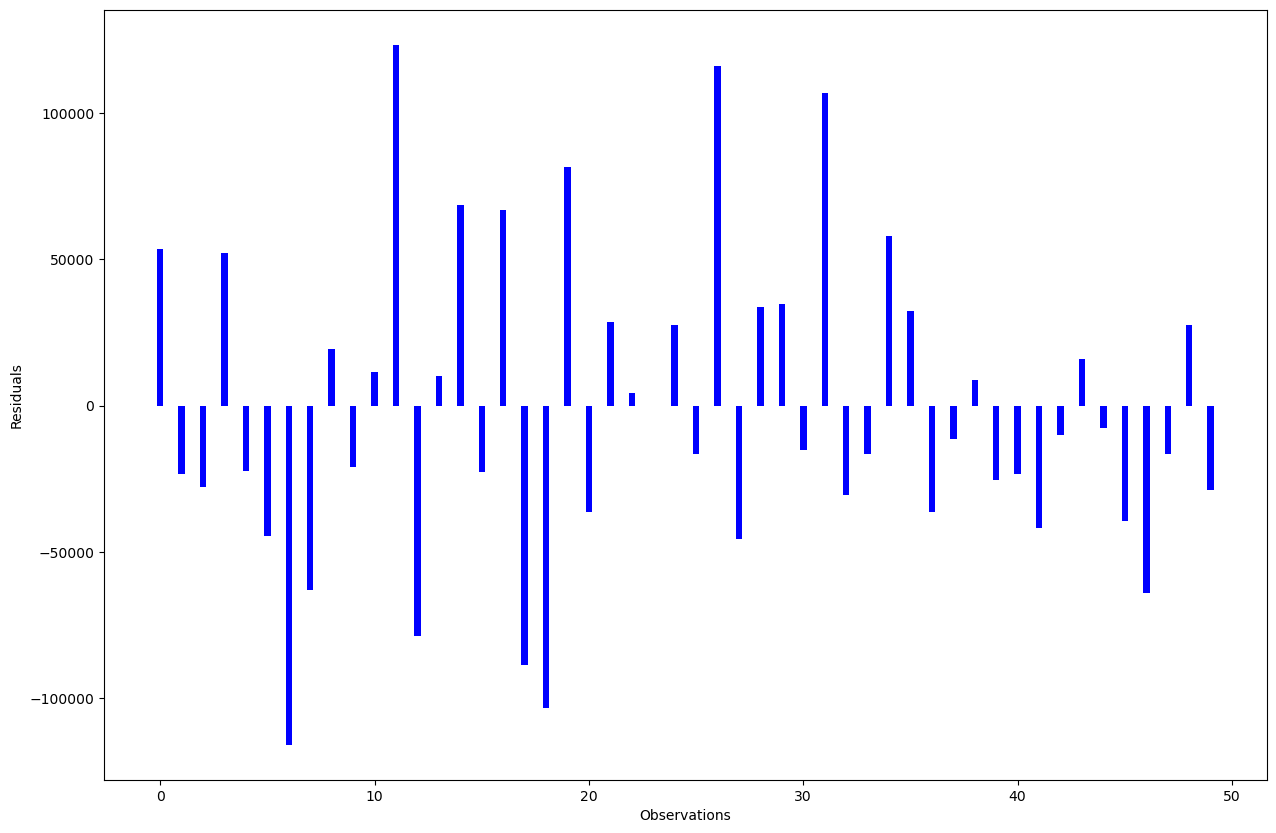

In [24]:
fig = plt.figure(figsize=(15,10))
plt.bar('index','error',data=df_values[:50],color='blue',width=0.3)
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()

In [25]:
X_train = sm.add_constant(X_train)
OLS = sm.OLS(y_train,X_train).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     2461.
Date:                Fri, 01 Sep 2023   Prob (F-statistic):               0.00
Time:                        01:10:10   Log-Likelihood:            -2.0532e+05
No. Observations:               16346   AIC:                         4.107e+05
Df Residuals:                   16333   BIC:                         4.108e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.046e+06   1.06e+05    -19.348      0.000   -2.25e+06   -1.84e+06
longitude          -2.628e+04   1147.802    -22.900      0.000   -2.85e+04    -2.4e+04
latitude           -2.482e+04   1131.230    -21.937      0.000    -2.7e+04   -2.26e+04
housing_median_age  1079.0978     49.192     21.937      0.000     982.677    1175.519
total_rooms           -5.6968      0.877     -6.499      0.000      -7.415      -3.979
total_bedrooms        95.9989      7.683     12.495      0.000      80.939     111.059
population           -36.8843      1.184    -31.159      0.000     -39.205     -34.564
households            50.1006      8.332      6.013      0.000      33.769      66.432
median_income       3.889e+04    375.933    103.458      0.000    3.82e+04    3.96e+04
<1H OCEAN          -1.842e+05   3.46e+04     -5.330      0.000   -2.52e+05   -1.16e+05
INLAND             -2.246e+05   3.46e+04     -6.485      0.000   -2.92e+05   -1.57e+05
NEAR BAY           -1.875e+05   3.46e+04     -5.419      0.000   -2.55e+05    -1.2e+05
NEAR OCEAN         -1.781e+05   3.46e+04     -5.153      0.000   -2.46e+05    -1.1e+05
==============================================================================
Omnibus:                     4023.157   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15278.445
Skew:                           1.190   Prob(JB):                         0.00
Kurtosis:                       7.095   Cond. No.                     8.05e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.05e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [27]:
print(f"1) Mean Absolute Error: {mae:.2f}")
print(f"2) Root Mean Squared Error: {rmse:.2f}")
print(f"3) Mean Squared Error: {mse:.2f}")
print(f"4) R2-squared: {r2:.2f}")

1) Mean Absolute Error: 48836.62
2) Root Mean Squared Error: 67162.17
3) Mean Squared Error: 4510757361.87
4) R2-squared: 0.66


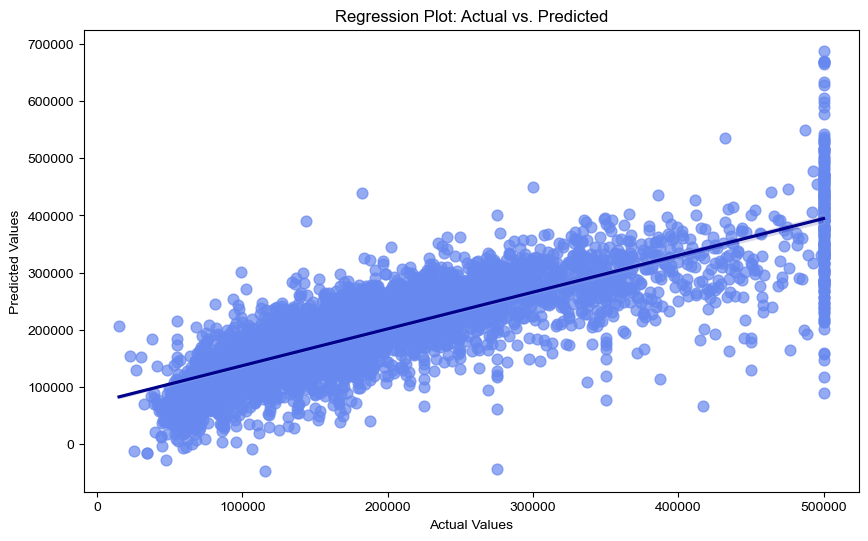

In [28]:
# Set a color palette for the plot
sns.set_palette("coolwarm")

# Create a regression plot with customized colors and styling
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Values', y='Predicted Values', data=df_values, scatter_kws={'alpha': 0.7, 's': 60}, line_kws={'color': 'darkblue'})
plt.title('Regression Plot: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Customize grid and background
sns.set_style("whitegrid")

# Show the plot
plt.show()

# **5.Saving Linear Regression Model**

In [29]:
j.dump(lr_model,'LinearRegressionModel.h5')

['LinearRegressionModel.h5']

# **6.Testing RandomForestRegressor Model** 

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
data = df_clean

X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [33]:
y_pred = rf_model.predict(X_test)

In [34]:
df_values = pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
pd.concat([df_values.head(),df_values.tail()])

,Actual Values,Predicted Values
14416,245800.0,218804.01
16383,137900.0,151863.00
7731,218200.0,195977.00
1410,220800.0,150635.00
1335,170500.0,156834.00
8291,500001.0,387438.10
6274,157900.0,161181.00
2997,100200.0,86084.00
13440,127700.0,108043.00
14797,133700.0,116502.00


In [35]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [36]:
print(f"1) Mean Absolute Error: {mae:.2f}")
print(f"2) Root Mean Squared Error: {rmse:.2f}")
print(f"3) Mean Squared Error: {mse:.2f}")
print(f"4) R2-squared: {r2:.2f}")

1) Mean Absolute Error: 31759.09
2) Root Mean Squared Error: 48751.51
3) Mean Squared Error: 2376709702.94
4) R2-squared: 0.83


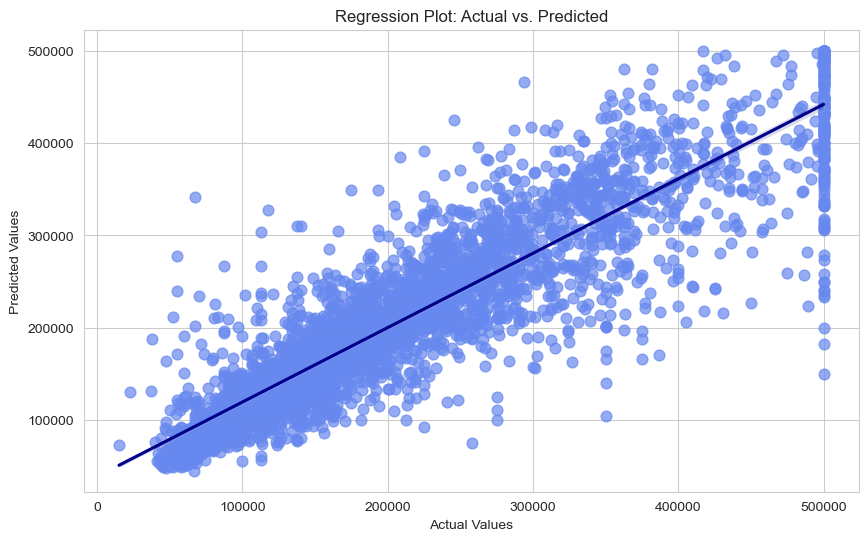

In [37]:
# Set a color palette for the plot
sns.set_palette("coolwarm")

# Create a regression plot with customized colors and styling
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Values', y='Predicted Values', data=df_values, scatter_kws={'alpha': 0.7, 's': 60}, line_kws={'color': 'darkblue'})
plt.title('Regression Plot: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Customize grid and background
sns.set_style("whitegrid")

# Show the plot
plt.show()

In [38]:
j.dump(rf_model,'RandomForestRegressorModel.h5')

['RandomForestRegressorModel.h5']

# **7.Testing a Neural Network Model**

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
data = df_clean

In [41]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5057 (19.75 KB)
Trainable params: 5057 (19.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

In [46]:
with tf.device('/GPU:0'):
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
409/409 [==============================] - 2s 2ms/step - loss: 37631696896.0000 - mean_absolute_error: 155832.0469 - val_loss: 11010881536.0000 - val_mean_absolute_error: 82626.2031
Epoch 2/100
409/409 [==============================] - 1s 1ms/step - loss: 9508405248.0000 - mean_absolute_error: 76464.9219 - val_loss: 8955448320.0000 - val_mean_absolute_error: 74640.4375
Epoch 3/100
409/409 [==============================] - 1s 1ms/step - loss: 8250808832.0000 - mean_absolute_error: 70084.7734 - val_loss: 8099048448.0000 - val_mean_absolute_error: 68690.7969
Epoch 4/100
409/409 [==============================] - 1s 2ms/step - loss: 7502622720.0000 - mean_absolute_error: 66106.3594 - val_loss: 7366277632.0000 - val_mean_absolute_error: 64833.0039
Epoch 5/100
409/409 [==============================] - 1s 1ms/step - loss: 6776796160.0000 - mean_absolute_error: 62260.6445 - val_loss: 6631722496.0000 - val_mean_absolute_error: 61610.2500
Epoch 6/100
409/409 [=====================

Epoch 44/100
409/409 [==============================] - 1s 1ms/step - loss: 4455056384.0000 - mean_absolute_error: 47046.4688 - val_loss: 4609576960.0000 - val_mean_absolute_error: 47587.1562
Epoch 45/100
409/409 [==============================] - 1s 2ms/step - loss: 4444157440.0000 - mean_absolute_error: 46959.1094 - val_loss: 4588775936.0000 - val_mean_absolute_error: 47592.5977
Epoch 46/100
409/409 [==============================] - 1s 1ms/step - loss: 4440283648.0000 - mean_absolute_error: 46963.5273 - val_loss: 4667559936.0000 - val_mean_absolute_error: 46788.5547
Epoch 47/100
409/409 [==============================] - 1s 1ms/step - loss: 4430252032.0000 - mean_absolute_error: 46901.0078 - val_loss: 4569016832.0000 - val_mean_absolute_error: 47602.2930
Epoch 48/100
409/409 [==============================] - 1s 1ms/step - loss: 4430345728.0000 - mean_absolute_error: 46942.3125 - val_loss: 4604054528.0000 - val_mean_absolute_error: 46872.5039
Epoch 49/100
409/409 [==================

Epoch 87/100
409/409 [==============================] - 1s 1ms/step - loss: 4254516480.0000 - mean_absolute_error: 45736.9180 - val_loss: 4408870400.0000 - val_mean_absolute_error: 45691.2695
Epoch 88/100
409/409 [==============================] - 1s 1ms/step - loss: 4252966400.0000 - mean_absolute_error: 45763.7109 - val_loss: 4350730240.0000 - val_mean_absolute_error: 46575.5391
Epoch 89/100
409/409 [==============================] - 1s 2ms/step - loss: 4252001536.0000 - mean_absolute_error: 45651.0625 - val_loss: 4391384576.0000 - val_mean_absolute_error: 47746.0586
Epoch 90/100
409/409 [==============================] - 1s 2ms/step - loss: 4252592384.0000 - mean_absolute_error: 45725.2148 - val_loss: 4365659136.0000 - val_mean_absolute_error: 45833.7617
Epoch 91/100
409/409 [==============================] - 1s 1ms/step - loss: 4241565184.0000 - mean_absolute_error: 45600.7969 - val_loss: 4340491776.0000 - val_mean_absolute_error: 46598.8242
Epoch 92/100
409/409 [==================

In [47]:
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

128/128 [==============================] - 0s 1ms/step - loss: 4296019456.0000 - mean_absolute_error: 46004.1406
Test Loss: 4296019456.0
Test MAE: 46004.140625


In [48]:
y_pred = model.predict(X_test_scaled)

# Create a DataFrame with actual and predicted values
df_values = pd.DataFrame({'Actual Values': y_test.values, 'Predicted Values': y_pred.flatten()})
df_values

128/128 [==============================] - 0s 886us/step


,Actual Values,Predicted Values
0,245800.0,187674.953125
1,137900.0,145728.796875
2,218200.0,188958.515625
3,220800.0,158930.890625
4,170500.0,198084.625000
...,...,...
4082,500001.0,297642.312500
4083,157900.0,163785.640625
4084,100200.0,121015.531250
4085,127700.0,119227.281250


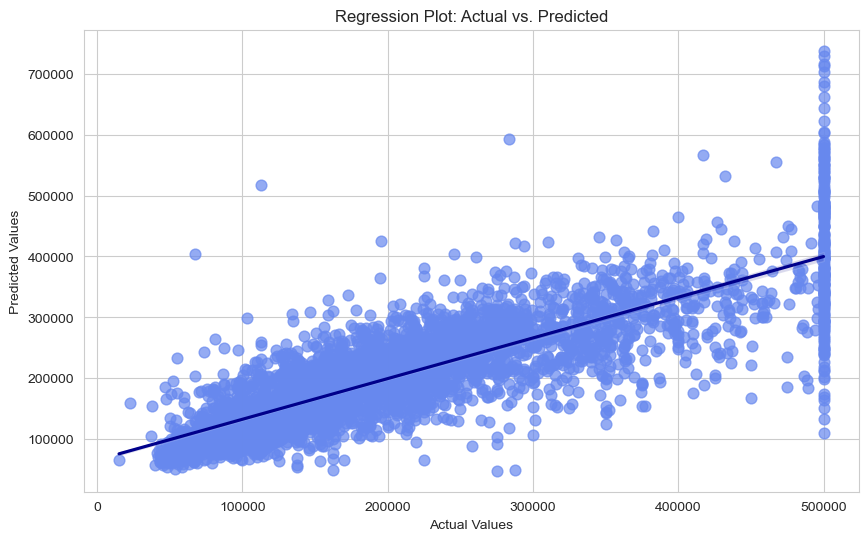

In [49]:
# Set a color palette for the plot
sns.set_palette("coolwarm")

# Create a regression plot with customized colors and styling
plt.figure(figsize=(10, 6))
sns.regplot(x='Actual Values', y='Predicted Values', data=df_values, scatter_kws={'alpha': 0.7, 's': 60}, line_kws={'color': 'darkblue'})
plt.title('Regression Plot: Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Customize grid and background
sns.set_style("whitegrid")

# Show the plot
plt.show()

In [50]:
model.save('RegressionNeuralnetwork.keras')